<h1><center>$$\underline{{\color{blue}{Ecole~Nationale~des~Sciences~de~l'Informatique}}}$$</center></h1>
<h2><center>$${\color{red}{\underline{Projet~IA}}}$$</center></h2>
<h3><center>$$\large{{\color{green}{Subjet:}}~\underline{Système~de~recommandation~des~livres}}$$</center></h3>
<h3><center>$$Ce~travail~est~réalisé~par:$$</center></h3>
<h3><center>$${\color{red}{\underline{Abir~Rokbani~~~-~~~Mouna~Ben~Gacem}}}$$</center></h3>
<h3><center>$$Enseignante:~{\color{blue}{\underline{Raoudha~Chebil}
}}$$</center></h3>

 ${\color{green}{*}}~Load~packages$

In [113]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

 ${\color{green}{*}}~Load~data$

In [114]:
book_data = pd.read_csv('BX-Books.csv', sep=';',error_bad_lines=False , encoding="latin-1")
book_data.columns = ['book_id', 'book_title', 'book_author', 'year_of_publication', 'publisher', 'imageUrlS', 'imageUrlM', 'imageUrlL']
user_data = pd.read_csv('BX-Users.csv', sep=';',error_bad_lines=False , encoding="latin-1")
user_data.columns = ['user_id', 'Location', 'Age']
book_rating = pd.read_csv('BX-Book-Ratings.csv', sep=';',error_bad_lines=False , encoding="latin-1")
book_rating.columns = ['user_id', 'book_id', 'bookRating']

b'Skipping line 6452: expected 8 fields, saw 9\nSkipping line 43667: expected 8 fields, saw 10\nSkipping line 51751: expected 8 fields, saw 9\n'
b'Skipping line 92038: expected 8 fields, saw 9\nSkipping line 104319: expected 8 fields, saw 9\nSkipping line 121768: expected 8 fields, saw 9\n'
b'Skipping line 144058: expected 8 fields, saw 9\nSkipping line 150789: expected 8 fields, saw 9\nSkipping line 157128: expected 8 fields, saw 9\nSkipping line 180189: expected 8 fields, saw 9\nSkipping line 185738: expected 8 fields, saw 9\n'
b'Skipping line 209388: expected 8 fields, saw 9\nSkipping line 220626: expected 8 fields, saw 9\nSkipping line 227933: expected 8 fields, saw 11\nSkipping line 228957: expected 8 fields, saw 10\nSkipping line 245933: expected 8 fields, saw 9\nSkipping line 251296: expected 8 fields, saw 9\nSkipping line 259941: expected 8 fields, saw 9\nSkipping line 261529: expected 8 fields, saw 9\n'
/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:27

# ${\color{green}{I)}}~Data~Exploration$

In [115]:
print(book_data.shape)
print(user_data.shape)
print(book_rating.shape)

(271360, 8)
(278858, 3)
(1149780, 3)


In [116]:
book_data.head()

,book_id,book_title,book_author,year_of_publication,publisher,imageUrlS,imageUrlM,imageUrlL
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [117]:
user_data.head()

,user_id,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [118]:
book_rating.head()

,user_id,book_id,bookRating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [119]:
book_data.dtypes

book_id                object
book_title             object
book_author            object
year_of_publication    object
publisher              object
imageUrlS              object
imageUrlM              object
imageUrlL              object
dtype: object

In [120]:
user_data.dtypes

user_id       int64
Location     object
Age         float64
dtype: object

In [121]:
book_rating.dtypes

user_id        int64
book_id       object
bookRating     int64
dtype: object

In [122]:
book_data.isna().sum()

book_id                0
book_title             0
book_author            1
year_of_publication    0
publisher              2
imageUrlS              0
imageUrlM              0
imageUrlL              3
dtype: int64

In [123]:
user_data.isna().sum()

user_id          0
Location         0
Age         110762
dtype: int64

In [124]:
book_rating.isna().sum()

user_id       0
book_id       0
bookRating    0
dtype: int64

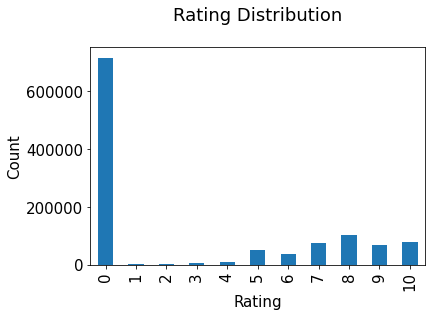

In [125]:
plt.rc("font", size=15)
book_rating.bookRating.value_counts(sort=False).plot(kind='bar')
plt.title('Rating Distribution\n')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

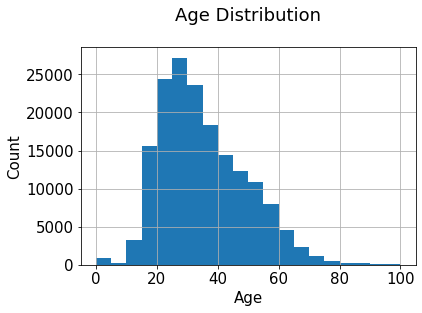

In [126]:
user_data.Age.hist(bins=[0, 5,10, 15,20,25, 30, 35,40,45, 50, 55,60,65,70,75,80,90,100])
plt.title('Age Distribution\n')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

In [127]:
data = pd.DataFrame(book_rating.groupby('book_id')['bookRating'].mean())
data['ratingCount'] = pd.DataFrame(book_rating.groupby('book_id')['bookRating'].count())
data.sort_values('ratingCount', ascending=False).head()

,bookRating,ratingCount
book_id,,
0971880107,1.019584,2502
0316666343,4.468726,1295
0385504209,4.652322,883
0060928336,3.448087,732
0312195516,4.334716,723


In [128]:
book_rating.bookRating.describe()

count    1.149780e+06
mean     2.866950e+00
std      3.854184e+00
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      7.000000e+00
max      1.000000e+01
Name: bookRating, dtype: float64

In [129]:
book_rating['bookRating'].value_counts()

0     716109
8     103736
10     78610
7      76457
9      67541
5      50974
6      36924
4       8904
3       5996
2       2759
1       1770
Name: bookRating, dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


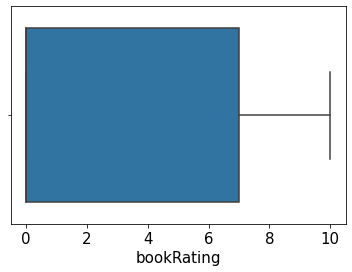

In [130]:
sns.boxplot(book_rating['bookRating'])

In [131]:
print("Unique UserID count: %s" % str(book_rating['user_id'].nunique()))
print("Unique BookID count: %s" % str(book_rating['book_id'].nunique()))

Unique UserID count: 105283
Unique BookID count: 340556


# ${\color{green}{II)}}~Collaborative~Filtering~$




In [132]:
data1 = pd.merge(book_rating, book_data, on='book_id')
columns = ['year_of_publication', 'publisher', 'book_author', 'imageUrlS', 'imageUrlM', 'imageUrlL']
data1 = data1.drop(columns, axis=1)
data1.head(220)

,user_id,book_id,bookRating,book_title
0,276725,034545104X,0,Flesh Tones: A Novel
1,2313,034545104X,5,Flesh Tones: A Novel
2,6543,034545104X,0,Flesh Tones: A Novel
3,8680,034545104X,5,Flesh Tones: A Novel
4,10314,034545104X,9,Flesh Tones: A Novel
...,...,...,...,...
215,37712,038550120X,0,A Painted House
216,37800,038550120X,9,A Painted House
217,39441,038550120X,0,A Painted House
218,39646,038550120X,0,A Painted House


In [133]:
data2 = (data1.groupby(by = ['book_title'])['bookRating'].count().reset_index().rename(columns = {'bookRating': 'total'})[['book_title', 'total']])
data2.head()

,book_title,total
0,A Light in the Storm: The Civil War Diary of ...,4
1,Always Have Popsicles,1
2,Apple Magic (The Collector's series),1
3,"Ask Lily (Young Women of Faith: Lily Series, ...",1
4,Beyond IBM: Leadership Marketing and Finance ...,1


In [134]:
data3 =data1.merge(data2, left_on = 'book_title', right_on = 'book_title', how = 'left')
data3.head(220)

,user_id,book_id,bookRating,book_title,total
0,276725,034545104X,0,Flesh Tones: A Novel,60
1,2313,034545104X,5,Flesh Tones: A Novel,60
2,6543,034545104X,0,Flesh Tones: A Novel,60
3,8680,034545104X,5,Flesh Tones: A Novel,60
4,10314,034545104X,9,Flesh Tones: A Novel,60
...,...,...,...,...,...
215,37712,038550120X,0,A Painted House,838
216,37800,038550120X,9,A Painted House,838
217,39441,038550120X,0,A Painted House,838
218,39646,038550120X,0,A Painted House,838


In [135]:
pop_value = 50
data4 = data3.query('total >= @pop_value')
data4.head(220)

,user_id,book_id,bookRating,book_title,total
0,276725,034545104X,0,Flesh Tones: A Novel,60
1,2313,034545104X,5,Flesh Tones: A Novel,60
2,6543,034545104X,0,Flesh Tones: A Novel,60
3,8680,034545104X,5,Flesh Tones: A Novel,60
4,10314,034545104X,9,Flesh Tones: A Novel,60
...,...,...,...,...,...
222,43842,038550120X,0,A Painted House,838
223,44963,038550120X,0,A Painted House,838
224,49683,038550120X,0,A Painted House,838
225,53174,038550120X,0,A Painted House,838


In [136]:
data3.shape

(1031136, 5)

In [137]:
data4.shape

(288740, 5)

In [138]:
from scipy.sparse import csr_matrix
data4 = data4.drop_duplicates(['user_id', 'book_title'])
data4_pivot = data4.pivot(index = 'book_title', columns = 'user_id', values = 'bookRating').fillna(0)
data_matrix = csr_matrix(data4_pivot.values)
data4_pivot.shape

(2444, 47994)

In [139]:
from sklearn.neighbors import NearestNeighbors
knn = NearestNeighbors(metric = 'cosine')
knn.fit(data_matrix)

NearestNeighbors(algorithm='auto', leaf_size=30, metric='cosine',
                 metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                 radius=1.0)

In [140]:
dict = {}
for i in range(data_matrix.shape[0]):
  dict[data4_pivot.index[i]] = i
print(dict)

{'10 Lb. Penalty': 0, '16 Lighthouse Road': 1, '1984': 2, '1st to Die: A Novel': 3, '2010: Odyssey Two': 4, '204 Rosewood Lane': 5, '2061: Odyssey Three': 6, '24 Hours': 7, '2nd Chance': 8, '3rd Degree': 9, '4 Blondes': 10, '50 Simple Things You Can Do to Save the Earth': 11, '84 Charing Cross Road': 12, 'A 2nd Helping of Chicken Soup for the Soul (Chicken Soup for the Soul Series (Paper))': 13, 'A Beautiful Mind: The Life of Mathematical Genius and Nobel Laureate John Nash': 14, 'A Bend in the Road': 15, 'A Case of Need': 16, 'A Child Called \\It\\": One Child\'s Courage to Survive"': 17, 'A Civil Action': 18, 'A Clockwork Orange (Norton Paperback Fiction)': 19, 'A Cold Heart (Alex Delaware Novels (Paperback))': 20, 'A Cold Heart: An Alex Delaware Novel': 21, 'A Confederacy of Dunces': 22, 'A Confederacy of Dunces (Evergreen Book)': 23, 'A Cry In The Night': 24, "A Cup of Tea (Ballantine Reader's Circle)": 25, 'A Dangerous Fortune': 26, 'A Darkness More Than Night': 27, 'A Day Late an

In [141]:
def recommendation(title):
 
  ind = dict[title]
  distances, indices = knn.kneighbors(data4_pivot.iloc[ind,:].values.reshape(1, -1), n_neighbors = 10)
  
  for i in range(0, len(distances.flatten())):
    if i == 0:
        print("Recommendations for :" ,data4_pivot.index[ind] ,"\n")
    else:
      print(i,":",data4_pivot.index[indices.flatten()[i]],"with distance of", distances.flatten()[i])
        


In [142]:
recommendation('16 Lighthouse Road')

Recommendations for : 16 Lighthouse Road 

1 : Hurricane Bay with distance of 0.765919041125994
2 : 204 Rosewood Lane with distance of 0.7700750185907947
3 : Dangerous with distance of 0.8066883284051383
4 : Rising Tides with distance of 0.8080944266281938
5 : Macgregor Brides (Macgregors) with distance of 0.8146040901362714
6 : Until You with distance of 0.8178463978903329
7 : Tapestry with distance of 0.8297683405747119
8 : Purity in Death with distance of 0.8327491540820668
9 : French Silk with distance of 0.8404517850809274


# ${\color{green}{III)}}~Content~Based~Recommendation~System$

In [143]:
columns = ['year_of_publication', 'publisher','imageUrlS', 'imageUrlM', 'imageUrlL']
data = book_data.drop(columns, axis=1)
data.head()

,book_id,book_title,book_author
0,0195153448,Classical Mythology,Mark P. O. Morford
1,0002005018,Clara Callan,Richard Bruce Wright
2,0060973129,Decision in Normandy,Carlo D'Este
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata
4,0393045218,The Mummies of Urumchi,E. J. W. Barber


In [144]:
data=data.iloc[0:5000,:]

In [145]:
from sklearn.feature_extraction.text import TfidfVectorizer


tfv = TfidfVectorizer(min_df=3,  max_features=None, 
            strip_accents='unicode', analyzer='word',token_pattern=r'\w{1,}',
            ngram_range=(1, 3),
            stop_words = 'english')

# Filling NaNs with empty string
data['book_author'] = data['book_author'].fillna('')

In [146]:
# Fitting the TF-IDF on the 'book_author' text
tfv_matrix = tfv.fit_transform(data['book_author'])

In [147]:
tfv_matrix.shape

(5000, 1433)

In [148]:

cosine_matrix=np.dot(tfv_matrix,tfv_matrix.T)
cosine_matrix=cosine_matrix.toarray()

In [149]:
cosine_matrix[0]

array([1., 0., 0., ..., 0., 0., 0.])

In [150]:
# Reverse mapping of indices and book titles
indices = pd.Series(data.index, index=data['book_title']).drop_duplicates()

In [151]:
indices

book_title
Classical Mythology                                                                                      0
Clara Callan                                                                                             1
Decision in Normandy                                                                                     2
Flu: The Story of the Great Influenza Pandemic of 1918 and the Search for the Virus That Caused It       3
The Mummies of Urumchi                                                                                   4
                                                                                                      ... 
Strong Poison                                                                                         4995
The Bad Girl's Guide to Getting What You Want                                                         4996
A Matter of Honor                                                                                     4997
Black Water               

In [152]:
def content_based_rec(title):
    idx = indices[title]
    sig_scores = sorted(list(enumerate(cosine_matrix[idx])), key=lambda x: x[1], reverse=True)
    sig_scores = sig_scores[1:11]
    book_indices = [i[0] for i in sig_scores]
    # Top 10 most similar books
    return data['book_title'].iloc[book_indices]

In [153]:

content_based_rec('Clara Callan')

951     The Mp3 and Internet Audio Handbook: Your Guid...
1315                                   THIS HALLOWED GRND
1418                               My Teacher is an Alien
2520    Thirty Five Thousand Plus Baby Names: The Larg...
4705                    Golf Hall of Shame-12 Copy Prepak
4287    Spy Catcher: The Candid Autobiography of a Sen...
3479          Poison Apples (Worldwide Library Mysteries)
1015                                The Real Mother Goose
141                                  The Angelic Darkness
394           Astral Travel for Beginners (For Beginners)
Name: book_title, dtype: object

In [154]:
content_based_rec('Microserfs')

4382                      LIFE AFTER GOD : LIFE AFTER GOD
4641       Generation X: Tales for an Accelerated Culture
2511                  Principles of Instrumental Analysis
2821    The 21 Lessons of Merlyn: A Study in Druid Mag...
4410                                              The Day
2967         Godel, Escher, Bach: An Eternal Golden Braid
1901                The Unofficial Guide to Having a Baby
1615                                      The Big Picture
1525                           The Cabinet of Curiosities
2428                                            Reliquary
Name: book_title, dtype: object

# ${\color{green}{IV)}}~hybrid~Recommendation~System$


In [155]:
from scipy.sparse import csr_matrix
data4 = data4.drop_duplicates(['user_id', 'book_title'])
data4_pivot = data4.pivot(index = 'book_title', columns = 'user_id', values = 'bookRating').fillna(0)
data_matrix = csr_matrix(data4_pivot.values)
data4_pivot.shape

(2444, 47994)

In [156]:
columns = ['year_of_publication', 'publisher','imageUrlS', 'imageUrlM', 'imageUrlL']
data = book_data.drop(columns, axis=1)
data.head()
#data=data.iloc[0:5000,:]

,book_id,book_title,book_author
0,0195153448,Classical Mythology,Mark P. O. Morford
1,0002005018,Clara Callan,Richard Bruce Wright
2,0060973129,Decision in Normandy,Carlo D'Este
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata
4,0393045218,The Mummies of Urumchi,E. J. W. Barber


In [157]:
from sklearn.feature_extraction.text import TfidfVectorizer


tfv = TfidfVectorizer(max_features=None, 
            strip_accents='unicode', analyzer='word',token_pattern=r'\w{1,}',
            ngram_range=(1, 3),
            stop_words = 'english')

# Filling NaNs with empty string
data['book_author'] = data['book_author'].fillna('')

In [158]:
from sklearn.neighbors import NearestNeighbors
knn = NearestNeighbors(metric = 'cosine')
knn.fit(data_matrix)

NearestNeighbors(algorithm='auto', leaf_size=30, metric='cosine',
                 metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                 radius=1.0)

In [159]:
dict = {}
for i in range(data_matrix.shape[0]):
  dict[data4_pivot.index[i]] = i
print(dict)
tit= '16 Lighthouse Road'
ind = dict[tit]
distances, indices = knn.kneighbors(data4_pivot.iloc[ind,:].values.reshape(1, -1), n_neighbors = 20)

{'10 Lb. Penalty': 0, '16 Lighthouse Road': 1, '1984': 2, '1st to Die: A Novel': 3, '2010: Odyssey Two': 4, '204 Rosewood Lane': 5, '2061: Odyssey Three': 6, '24 Hours': 7, '2nd Chance': 8, '3rd Degree': 9, '4 Blondes': 10, '50 Simple Things You Can Do to Save the Earth': 11, '84 Charing Cross Road': 12, 'A 2nd Helping of Chicken Soup for the Soul (Chicken Soup for the Soul Series (Paper))': 13, 'A Beautiful Mind: The Life of Mathematical Genius and Nobel Laureate John Nash': 14, 'A Bend in the Road': 15, 'A Case of Need': 16, 'A Child Called \\It\\": One Child\'s Courage to Survive"': 17, 'A Civil Action': 18, 'A Clockwork Orange (Norton Paperback Fiction)': 19, 'A Cold Heart (Alex Delaware Novels (Paperback))': 20, 'A Cold Heart: An Alex Delaware Novel': 21, 'A Confederacy of Dunces': 22, 'A Confederacy of Dunces (Evergreen Book)': 23, 'A Cry In The Night': 24, "A Cup of Tea (Ballantine Reader's Circle)": 25, 'A Dangerous Fortune': 26, 'A Darkness More Than Night': 27, 'A Day Late an

In [160]:
data4_pivot.index[ind]

'16 Lighthouse Road'

In [161]:
list1= [data4_pivot.index[ind]]
for i in range(0, len(distances.flatten())):
    if i == 0:
        print('Recommendations for {0}:\n'.format(data4_pivot.index[ind]))
    else:
        title=data4_pivot.index[indices.flatten()[i]]
        list1.append(title)
data10 = data.loc[data['book_title'].isin(list1),:]        

data11 = data10
data11['book_title'] = data11['book_title'].drop_duplicates()
data11 = data11.dropna()
data11=data11.reset_index()
data11.drop('index',axis=1,inplace=True)
data11.head(220)


Recommendations for 16 Lighthouse Road:



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


,book_id,book_title,book_author
0,042518630X,Purity in Death,J.D. Robb
1,0821772953,The Morning After,Lisa Jackson
2,0515131091,Out of This World,J. D. Robb
3,051512317X,Rising Tides,Nora Roberts
4,0425181464,Seduction in Death,J. D. Robb
5,0553293176,Dangerous,Amanda Quick
6,0451188616,The Heir,Catherine Coulter
7,1551669498,Girls Night,Stef Ann Holm
8,0425191583,Imitation in Death (Eve Dallas Mysteries (Pape...,J. D. Robb
9,0515129933,The Scottish Bride (Bride Trilogy (Paperback)),Catherine Coulter


In [162]:
# Fitting the TF-IDF on the 'book_author' text
tfv_matrix = tfv.fit_transform(data11['book_author'])
cosine_matrix=np.dot(tfv_matrix,tfv_matrix.T)
cosine_matrix=cosine_matrix.toarray()
# Reverse mapping of indices and book titles
indices = pd.Series(data11.index, index=data11['book_title']).drop_duplicates()

In [163]:
indices

book_title
Purity in Death                                           0
The Morning After                                         1
Out of This World                                         2
Rising Tides                                              3
Seduction in Death                                        4
Dangerous                                                 5
The Heir                                                  6
Girls Night                                               7
Imitation in Death (Eve Dallas Mysteries (Paperback))     8
The Scottish Bride (Bride Trilogy (Paperback))            9
Hurricane Bay                                            10
Macgregor Brides (Macgregors)                            11
Night Shield (Intimate Moments, 1027)                    12
Tapestry                                                 13
Until You                                                14
Born in Ice                                              15
The Bestseller               

In [169]:
def content_based_rec(title):
    idx = indices[title]
    sig_scores = sorted(list(enumerate(cosine_matrix[idx])), key=lambda x: x[1], reverse=True)
    sig_scores = sig_scores[1:11]
    book_indices = [i[0] for i in sig_scores]
    # Top 10 most similar books
    return data['book_title'].iloc[book_indices]

In [170]:
content_based_rec(tit)

19                 Beloved (Plume Contemporary Fiction)
0                                   Classical Mythology
1                                          Clara Callan
2                                  Decision in Normandy
3     Flu: The Story of the Great Influenza Pandemic...
4                                The Mummies of Urumchi
5                                The Kitchen God's Wife
6     What If?: The World's Foremost Military Histor...
7                                       PLEADING GUILTY
8     Under the Black Flag: The Romance and the Real...
Name: book_title, dtype: object

In [166]:
def hybrid_recommendation(title):
 
  ind = dict[title]
  distances, indices = knn.kneighbors(data4_pivot.iloc[ind,:].values.reshape(1, -1), n_neighbors = 20)
  list1= [data4_pivot.index[ind]]
  for i in range(0, len(distances.flatten())):
    if i == 0:
        print('Recommendations for {0}:\n'.format(data4_pivot.index[ind]))
    else:
        title=data4_pivot.index[indices.flatten()[i]]
        list1.append(title)
  data10 = data.loc[data['book_title'].isin(list1),:]        
  data11 = data10
  data11['book_title'] = data11['book_title'].drop_duplicates()
  data11 = data11.dropna()
  data11=data11.reset_index()
  data11.drop('index',axis=1,inplace=True)
  tfv_matrix = tfv.fit_transform(data11['book_author'])
  cosine_matrix=np.dot(tfv_matrix,tfv_matrix.T)
  cosine_matrix=cosine_matrix.toarray()
  indices = pd.Series(data11.index, index=data11['book_title']).drop_duplicates()
  idx = indices[title]

  sig_scores = sorted(list(enumerate(cosine_matrix[idx])), key=lambda x: x[1], reverse=True)

    # Scores of the 10 most similar books
  sig_scores = sig_scores[1:11]
  book_indices = [i[0] for i in sig_scores]

    # Top 10 most similar books
  return data11['book_title'].iloc[book_indices].drop_duplicates()


In [167]:
hybrid_recommendation('16 Lighthouse Road')

Recommendations for 16 Lighthouse Road:



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


2                                     Out of This World
4                                    Seduction in Death
8     Imitation in Death (Eve Dallas Mysteries (Pape...
1                                     The Morning After
3                                          Rising Tides
5                                             Dangerous
6                                              The Heir
7                                           Girls Night
9        The Scottish Bride (Bride Trilogy (Paperback))
10                                        Hurricane Bay
Name: book_title, dtype: object